In this notebook the data corresponding to the first four months of 2019 will be analyzed.

In [64]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import datetime
from statsmodels.api import OLS #For linear regression

from warnings import filterwarnings
filterwarnings('ignore')

In [29]:
pollutant = 'NO2'

In [4]:
df = pd.read_csv('../clean_datasets/%s-2019.csv'%(pollutant), index_col=0, parse_dates=True)

In [5]:
df.head()

,estacion,concentracion
dt,,
2019-01-01,18,67.0
2019-01-01,55,94.0
2019-01-01,4,73.0
2019-01-01,38,117.0
2019-01-01,54,111.0


I'll be working with the average concentration throughout all stations per hour.

In [6]:
df = df.groupby('dt')['concentracion'].mean()
df = pd.DataFrame(df)

Graphing the time series.

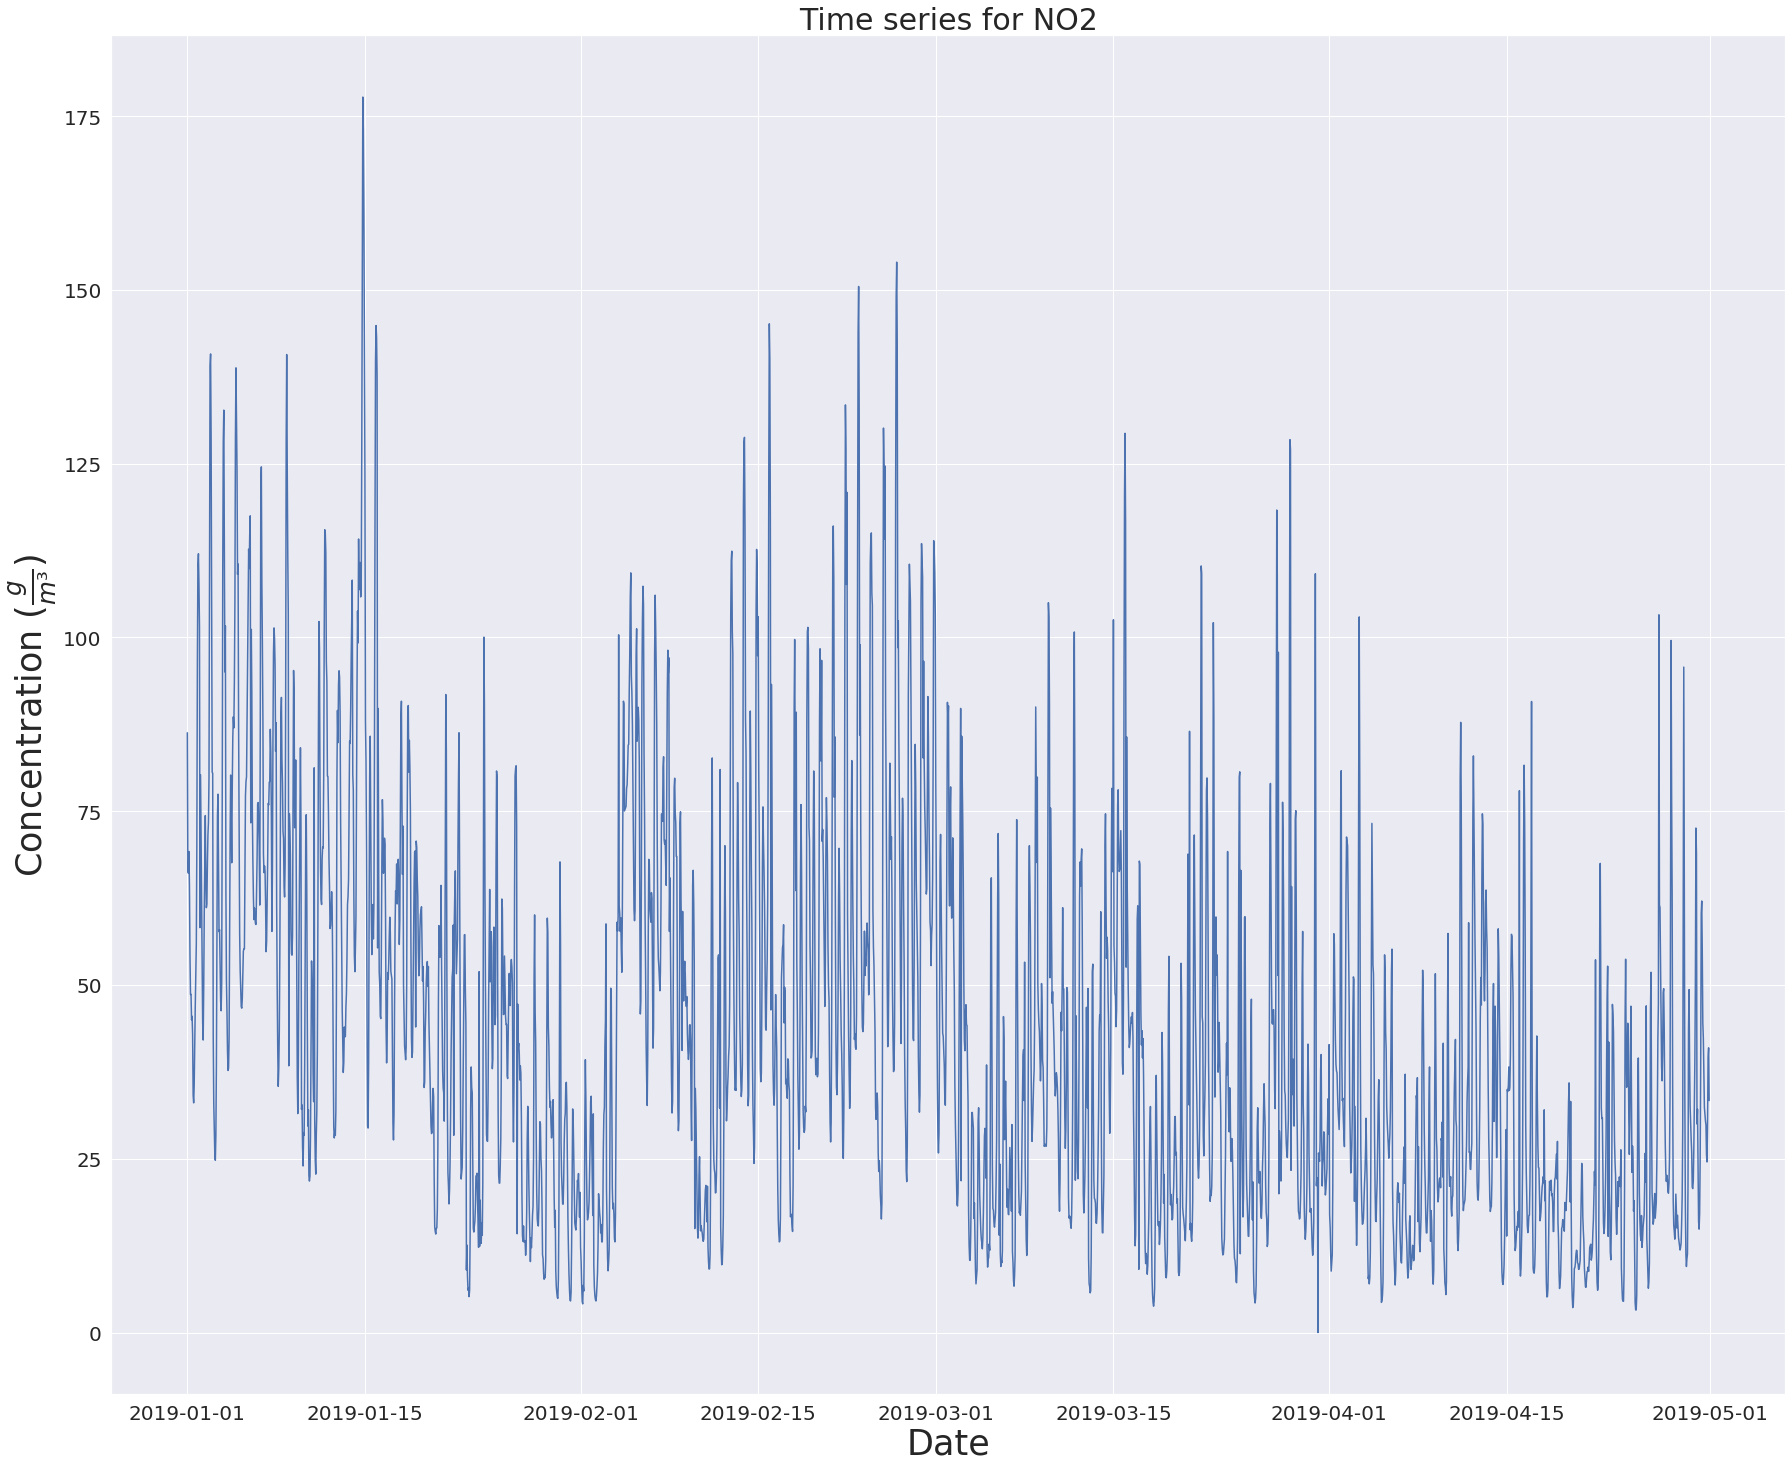

In [35]:
plt.figure(figsize=(30,25))
sns.lineplot(df.index, df['concentracion'])
plt.xlabel('Date', fontsize=35)
plt.ylabel(r'Concentration $(\frac{g}{m³})$', fontsize=35)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Time series for ' + pollutant, fontsize=30);

I'll use a simple moving average to smooth out the curve.

In [8]:
df['SMA'] = df.loc[:,'concentracion'].rolling(window = 30,
                                                min_periods = 1).mean()

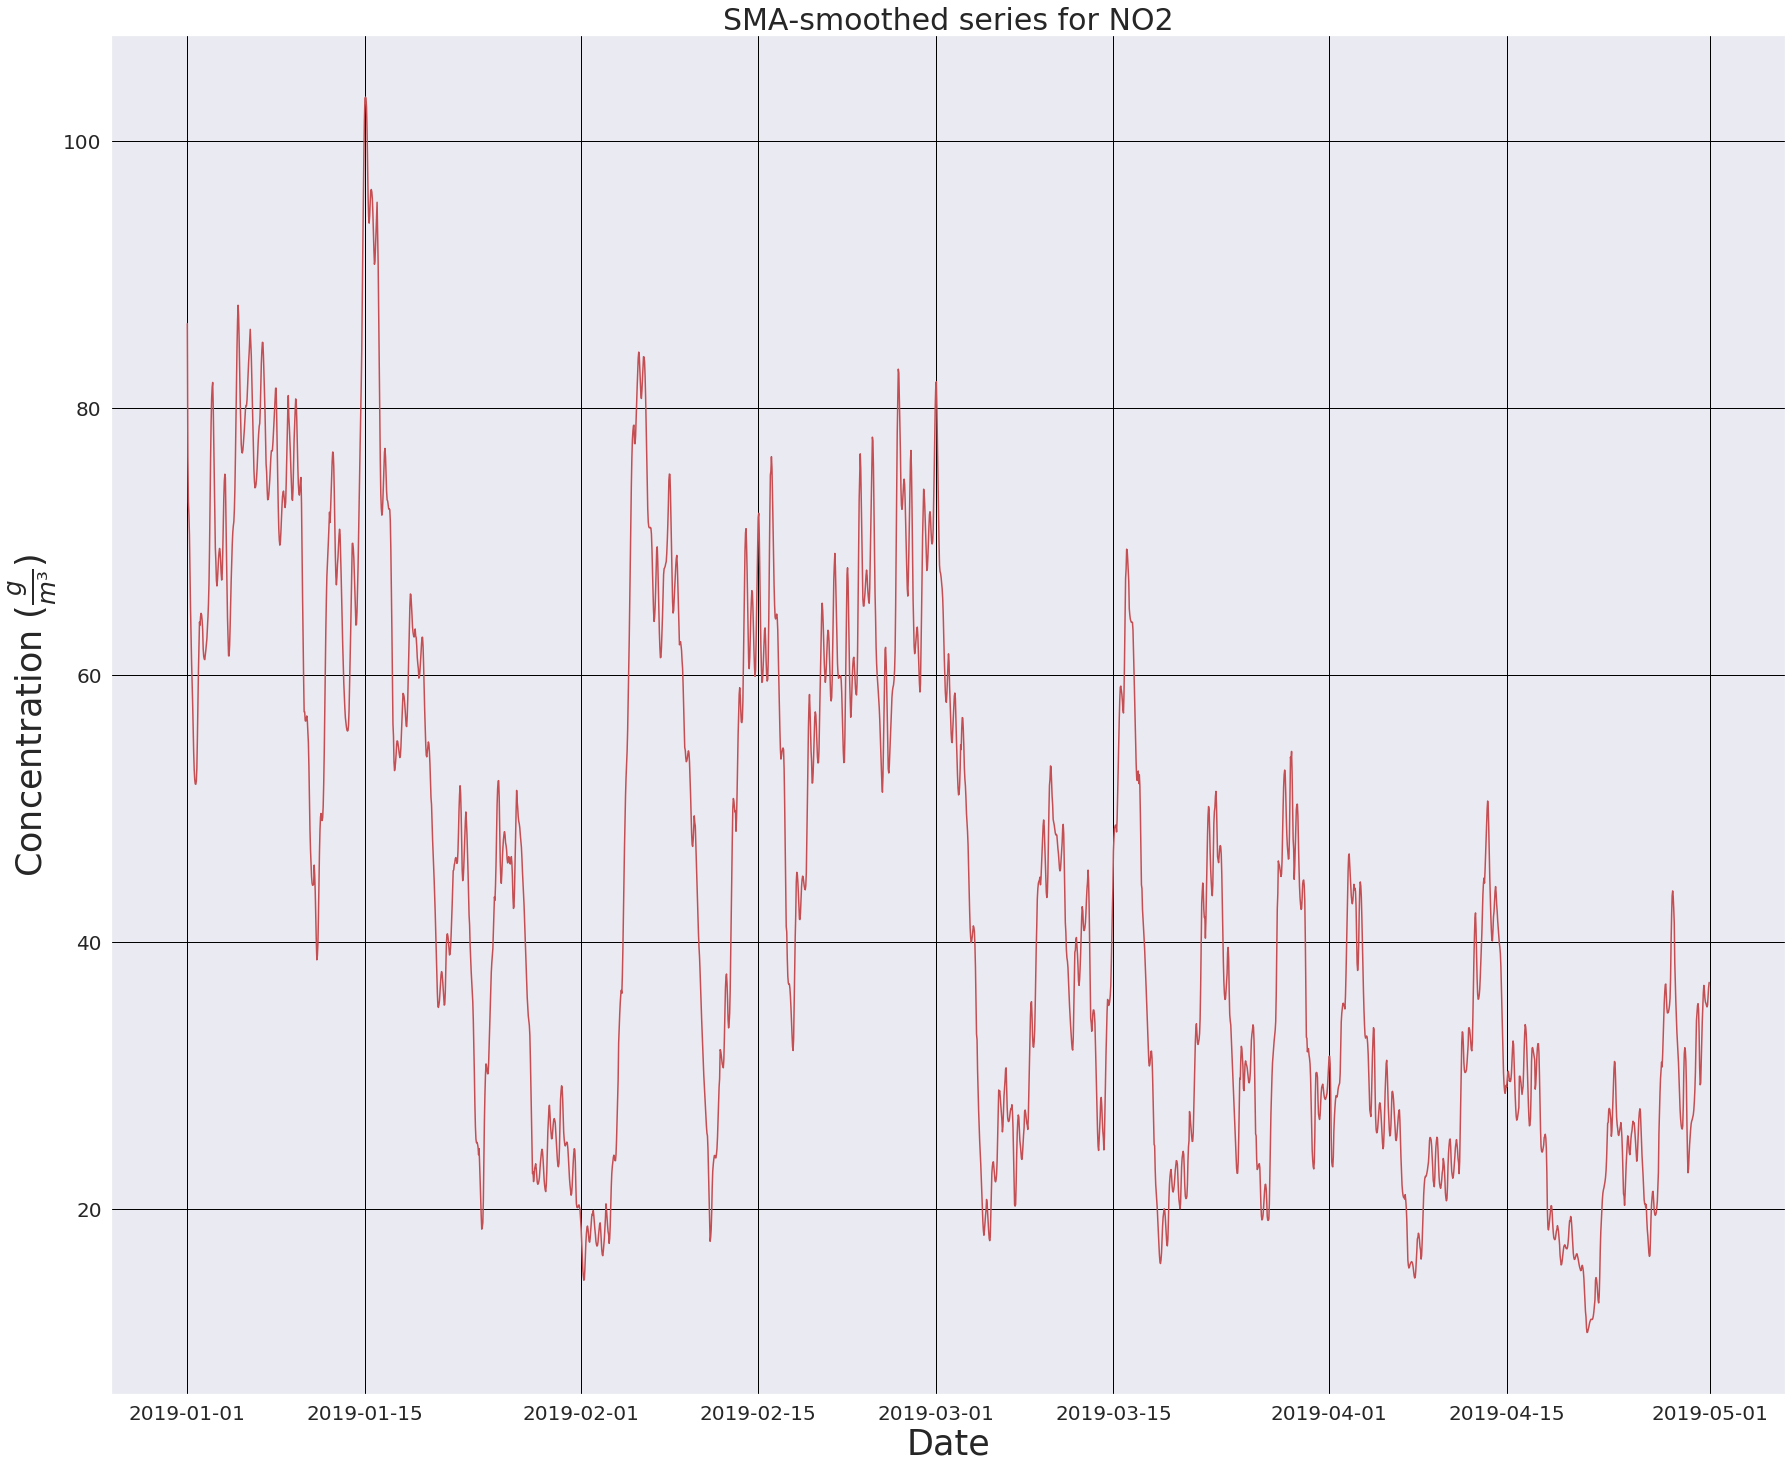

In [36]:
plt.figure(figsize=(30,25))
#sns.lineplot(df.index, df['concentracion'], color='blue', linestyle= ,label='original')
sns.lineplot(df.index, df['SMA'], color='r')
plt.xlabel('Date', fontsize=35)
plt.ylabel(r'Concentration $(\frac{g}{m³})$', fontsize=35)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(color = 'black')
plt.title('SMA-smoothed series for ' + pollutant, fontsize=30);

In [53]:
month_describe = df.groupby(df.index.month)['concentracion'].describe()

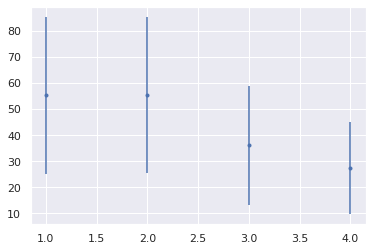

In [59]:
plt.errorbar(month_describe.index, month_describe['mean'].values, 
             yerr=month_describe['std'].values, fmt='.');

In [46]:
hour_describe = df.groupby(df.index.hour)['concentracion'].describe()

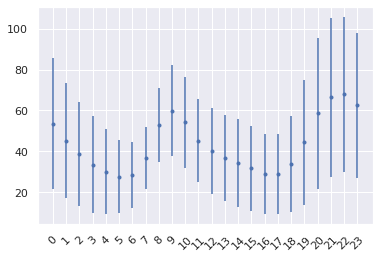

In [58]:
plt.errorbar(hour_describe.index, hour_describe['mean'].values, 
             yerr=hour_describe['std'].values, fmt='.') 
plt.xticks(hour_describe.index, rotation='45');

# Poincaré Diagram

In [60]:
#Calculating the correlation coefficient between x_n y x_{n + 1}
df['shifted'] = df['concentracion'].shift(1)

#Como la función shift deja un NaN en el primer renglón, se llenará con el promedio de
#todos los 31 de diciembre
#df.loc[df.index[0],'NO2_shifted'] = df[(df.index.month == 12) & (df.index.day == 31)]['NO2'].mean()
#df[['NO2','NO2_shifted']].corr()

In [65]:
model = OLS.from_formula('shifted ~ concentracion', data = df)
linear_reg = model.fit()
b0, b1 = linear_reg.params
linear_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                shifted   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                 1.107e+04
Date:                Mon, 04 May 2020   Prob (F-statistic):               0.00
Time:                        14:31:29   Log-Likelihood:                -11448.
No. Observations:                2879   AIC:                         2.290e+04
Df Residuals:                    2877   BIC:                         2.291e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.7347      0.439     10.782      0.000       3.874       5.596
concentracion     0.8913      0.008    105.235      0.000       0.875       0.908
==============================================================================
Omnibus:                      635.169   Durbin-Watson:                   1.564
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5188.759
Skew:                           0.815   Prob(JB):                         0.00
Kurtosis:                       9.372   Cond. No.                         94.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

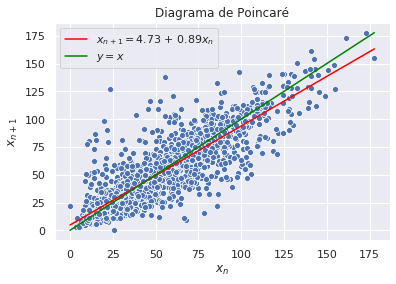

In [68]:
#Para el diagrama se usará la función shift para mover los valores un renglón
str_b0, str_b1 = str(round(b0,2)), str(round(b1,2))
sns.scatterplot(df['concentracion'],df['shifted'])
sns.lineplot(df['concentracion'], b0 + b1*df['concentracion'], color = 'red',
             label = r'$x_{n + 1} = $' + str_b0 + ' + ' + str_b1 + r'$x_n$')

sns.lineplot(df['concentracion'], df['concentracion'], color = 'green',
             label = r'$y = x$')
plt.xlabel(r'$x_n$')
plt.ylabel(r'$x_{n + 1}$')
plt.title('Diagrama de Poincaré');

I'll also make per-hour and per-day diagrams.

In [78]:
df.head()

,concentracion,SMA,shifted
dt,,,
2019-01-01 00:00:00,86.291667,86.291667,NaN
2019-01-01 01:00:00,66.458333,76.375000,86.291667
2019-01-01 02:00:00,66.083333,72.944444,66.458333
2019-01-01 03:00:00,69.208333,72.010417,66.083333
2019-01-01 04:00:00,64.375000,70.483333,69.208333
